In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("..")  # Go up one level to the UROP directory

In [2]:
import torch
from utils import SensorDataset
from torch.utils.data import DataLoader
import yaml

import librosa
import matplotlib.pyplot as plt
%matplotlib inline

with open("config.yaml") as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

sr_mic = config['sampling_rate']['mic']

In [3]:
# Initialize Dataset
dataset_mic = SensorDataset(root_dir="datasets/BrushlessMotor", split="train", sensors=["mic"]) 
dataloader_mic = DataLoader(dataset_mic, batch_size=64, shuffle=True, num_workers=2)

In [4]:
for batch_idx, data in enumerate(dataloader_mic):
    print(data.shape)
    break


torch.Size([64, 83200, 1])


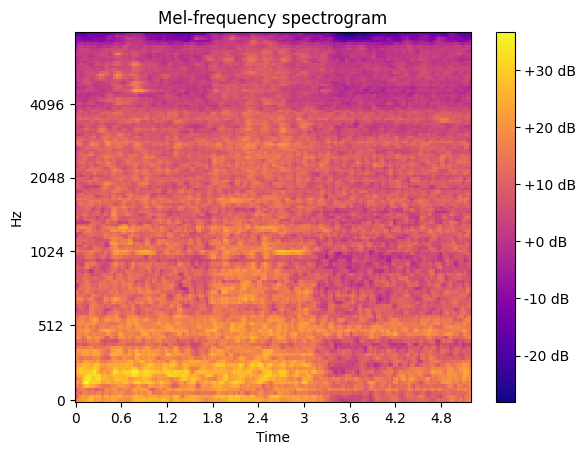

In [5]:
random_index = torch.randint(0, 64, (1,)).item()
mel_spectrogram = librosa.feature.melspectrogram(y=data[random_index, :, 0].numpy(), sr=sr_mic)
mel_log_spectrogram = librosa.power_to_db(mel_spectrogram)

plt.figure()
librosa.display.specshow(mel_log_spectrogram, x_axis='time', y_axis='mel', sr=sr_mic, cmap='plasma')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()